<h1>Nabar_Deven_HW2</h1>
<br>

<h2>Name: Deven Parag Nabar
<br>
Github Username: DevenNabar
<br>
USC ID: 7229446568<br></h2>

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
from tabulate import tabulate
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
import math

In [3]:
import warnings
warnings.filterwarnings('ignore')

Get the Cycle Power Plant Data Set

In [4]:
df = pd.read_excel('../CCPP/Folds5x2_pp.xlsx', sheet_name = 'Sheet1')

### (b) Exploring the data

#### i. rows and columns

In [5]:
num_rows=df.shape[0]
num_cols = df.shape[1]
print('ROWS',num_rows)
print('COLS',num_cols)

ROWS 9568
COLS 5


<p>Q) What do rows and columns represent? <br><hr>
Ans) The Rows represents 9568 data points, different parameters collected in a span of 6 years(2006-2011), from a combined cycle power plant (CCPP), The columns consists of parameters such as hourly Avg. ambient variables Temperture-AT, Ambient Pressure-AP, Relative Humidity-RH, Exhaust Vaccum-V. These will be used as the predictors/features in our model, and find out the Net hourly Electrical energy output-PE</p>

In [6]:
df


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


#### ii. pairwise scatterplots of all the varianbles

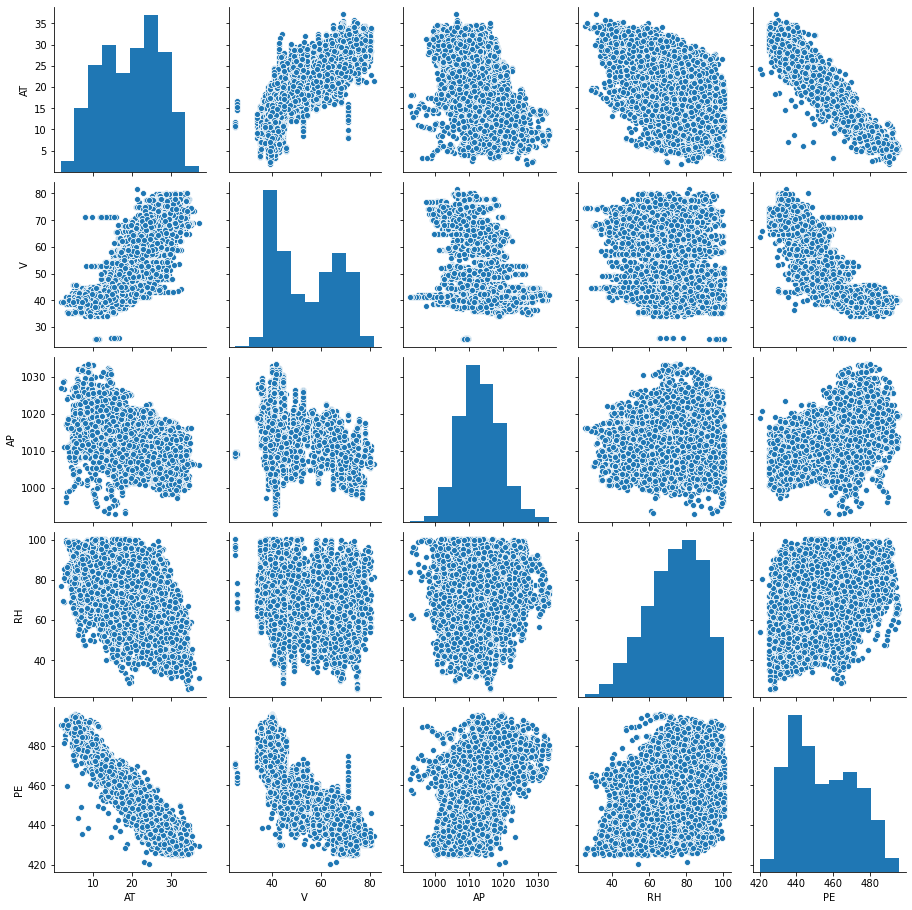

In [7]:
# Create a pairplot for all variables in 'df'
sns.pairplot(df)
plt.show()

<p>Q)Describe your findings.<br><hr> Ans) From these plots, we infer that features 'AT' and 'PE' are correlated. The pattern from the graph is that 'PE' decreases when 'AT' increases. Similarly we can find correlation between 'V' and 'PE' and also 'V' and 'AT'. When 'V' increases, 'PE' decreases also when 'V' increases, 'AT' increases</p>

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [8]:
#mean, median, range, Q1, Q3 and interquartile ranges 
data_stats = df.describe()
data_stats


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
data_stats.loc['range'] = data_stats.loc['max']- data_stats.loc['min']
data_stats.loc['IQR'] = data_stats.loc['75%'] - data_stats.loc['25%']
data_stats.loc['median'] = data_stats.loc['50%']
data_stats.loc['1st_quartile']=data_stats.loc['25%']
data_stats.loc['3rd_quartile']=data_stats.loc['75%']
data_stats

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


In [10]:
stats_df = tabulate(data_stats, headers='keys')
print(stats_df)

                      AT          V          AP         RH        PE
------------  ----------  ---------  ----------  ---------  --------
count         9568        9568       9568        9568       9568
mean            19.6512     54.3058  1013.26       73.309    454.365
std              7.45247    12.7079     5.93878    14.6003    17.067
min              1.81       25.36     992.89       25.56     420.26
25%             13.51       41.74    1009.1        63.3275   439.75
50%             20.345      52.08    1012.94       74.975    451.55
75%             25.72       66.54    1017.26       84.83     468.43
max             37.11       81.56    1033.3       100.16     495.76
range           35.3        56.2       40.41       74.6       75.5
IQR             12.21       24.8        8.16       21.5025    28.68
median          20.345      52.08    1012.94       74.975    451.55
1st_quartile    13.51       41.74    1009.1        63.3275   439.75
3rd_quartile    25.72       66.54    1017.26    

### (c) Simple Linear Regression

Hourly Average Ambient Variables Temperture (AT)


In [11]:
model_for_AT = smf.ols('PE~AT',df).fit()
AT_preds = model_for_AT.predict(df)

In [12]:
# Linear_Model_AT.params[0]
model_for_AT.params[0]
model_for_AT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:21   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__The feature AT__ is statistically significant as per the p-value which is <0.05 threshold.

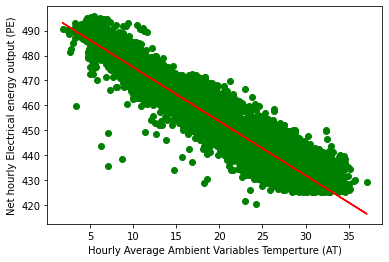

In [13]:
plt.scatter(df['AT'],df['PE'], color = 'green')
plt.plot(df['AT'],AT_preds, color = 'red')
plt.xlabel('Hourly Average Ambient Variables Temperture (AT)')
plt.ylabel('Net hourly Electrical energy output (PE)')  
plt.show()

Exhaust Vaccum (V)

In [14]:
model_for_V = smf.ols('PE~V',df).fit()
V_preds = model_for_V.predict(df)

In [15]:
model_for_V.params[0]
model_for_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:21   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__The feature V__ is statistically significant as per the p-value which is <0.05 threshold.

PLOTTING GRAPHS FOR PE v/s V

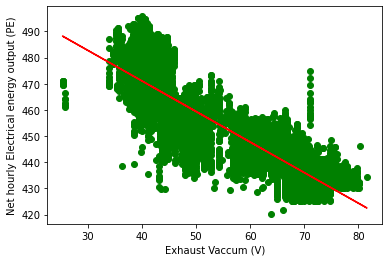

In [16]:
plt.scatter(df['V'],df['PE'], color = 'green')
plt.plot(df['V'],V_preds, color = 'red')
plt.xlabel('Exhaust Vaccum (V)')
plt.ylabel('Net hourly Electrical energy output (PE)')
plt.show()

Ambient Pressure (AP)

In [17]:
model_for_AP = smf.ols('PE~AP',df).fit()
AP_preds = model_for_AP.predict(df)

In [18]:
model_for_AP.params[0]
model_for_AP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:22   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__The feature AP__ is statistically significant as per the p-value which is <0.05 threshold.

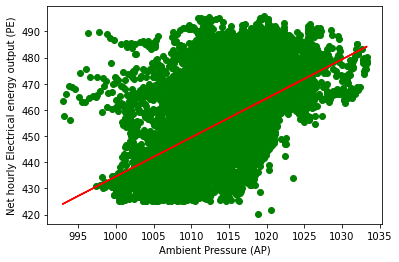

In [19]:
plt.scatter(df['AP'],df['PE'], color = 'green')
plt.plot(df['AP'],AP_preds, color = 'red')
plt.xlabel('Ambient Pressure (AP)')
plt.ylabel('Net hourly Electrical energy output (PE)')
plt.show()

In [20]:
model_for_RH = smf.ols('PE~RH',df).fit()
RH_preds = model_for_RH.predict(df)

In [21]:
model_for_RH.params[0]
model_for_RH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:22   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__The feature RH__ is statistically significant as per the p-value which is <0.05 threshold.

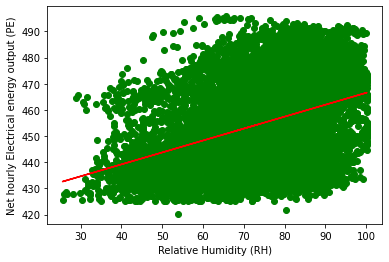

In [22]:
plt.scatter(df['RH'],df['PE'], color = 'green')
plt.plot(df['RH'],RH_preds, color = 'red')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Net hourly Electrical energy output (PE)')
plt.show()

After fitting the simple Linear Regression Model for each Predictor that is AT,V,AP and RH to predict the Reponse PE, and plotting scatter plot, We can state that all the Predicators have significant association with the Response, Because all have p value significantlly less than the threshold value which is 0.05

__Outlier Analysis using z-score__

In [23]:
from scipy import stats

In [24]:
zAP = np.abs(stats.zscore(df['RH']))
th = 3
arr = np.where(zAP>th)
print('OUTLIERS FOR FEATURE: RH - ',len(arr[0]))

OUTLIERS FOR FEATURE: RH -  7


In [25]:
zAP = np.abs(stats.zscore(df['AP']))
th = 3
arr = np.where(zAP>th)
print('OUTLIERS FOR FEATURE: AP - ',len(arr[0]))

OUTLIERS FOR FEATURE: AP -  51


In [26]:
zAP = np.abs(stats.zscore(df['AT']))
th = 3
arr = np.where(zAP>th)
print('OUTLIERS FOR FEATURE: AT - ',len(arr[0]))

OUTLIERS FOR FEATURE: AT -  0


In [27]:
zAP = np.abs(stats.zscore(df['V']))
th = 3
arr = np.where(zAP>th)
print('OUTLIERS FOR FEATURE: V - ',len(arr[0]))

OUTLIERS FOR FEATURE: V -  0


__And yes there are outliers that have to be removed, they are as follows__<br>
AP: 51, <br>
AT: 0, <br>
V: 0, <br>
RH: 7

### (d) Multiple Regression

In [28]:
model = smf.ols('PE~AT+V+AP+RH',df).fit()
model_preds = model.predict(df)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:23   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Hypothesis testing:__ <br>
__H0 : βj = 0__<br>
All features as part of the model are statistically significant, proven by the extremely low p values i.e. <0.05 meaning all of them are affect the value of the dependent variable PE.

### (e) 1c Compare to 1d

In [29]:
coefficient_values = [['AT',model_for_AT.params[1], model.params[1]],
              ['V', model_for_V.params[1], model.params[2]], 
              ['AP',model_for_AP.params[1], model.params[3]],
              ['RH',model_for_RH.params[1], model.params[4]]]
coeff_table = pd.DataFrame(coefficient_values, 
                           columns=['Features', 'By Simple Linear Regression', 'By Multi-linear Regression'])
coeff_table

,Features,By Simple Linear Regression,By Multi-linear Regression
0,AT,-2.171320,-1.977513
1,V,-1.168135,-0.233916
2,AP,1.489872,0.062083
3,RH,0.455650,-0.158054


In [30]:
stats_forMultiModel = model.summary().tables[1]
stats_forMultiModel

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,454.6093,9.749,46.634,0.000,435.500,473.718
AT,-1.9775,0.015,-129.342,0.000,-2.007,-1.948
V,-0.2339,0.007,-32.122,0.000,-0.248,-0.220
AP,0.0621,0.009,6.564,0.000,0.044,0.081
RH,-0.1581,0.004,-37.918,0.000,-0.166,-0.150


In [31]:
model_params = pd.read_html(stats_forMultiModel.as_html(),
                            header=0,index_col=0)[0]
model_coeff=model_params['coef']
#getting list of all coefficients for multi-linear model
model_coeff=model_coeff.tolist()[1:]
print(model_coeff)


[-1.9775, -0.2339, 0.0621, -0.1581]


In [32]:
linearModel_coeff = data_coeff = [model_for_AT.params[1],
               model_for_V.params[1], 
              model_for_AP.params[1],
              model_for_RH.params[1]]

In [33]:
linearModel_coeff

[-2.171319958517792,
 -1.1681351265557118,
 1.4898716733991115,
 0.4556501022629795]

<Figure size 576x288 with 0 Axes>

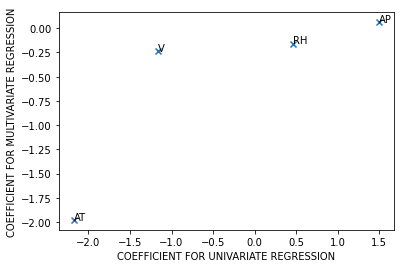

In [34]:
plt.figure(figsize=(8,4))
fig, a = plt.subplots()
a.scatter(linearModel_coeff, model_coeff,marker='x')
predictors = ['AT', 'V', 'AP', 'RH']
for i, feature in enumerate(predictors):
    a.annotate(feature, (linearModel_coeff[i], model_coeff[i]))
plt.xlabel('COEFFICIENT FOR UNIVARIATE REGRESSION')
plt.ylabel('COEFFICIENT FOR MULTIVARIATE REGRESSION')
plt.show()

The plot above compares the univariate regression to multivariate regression, wherein each point corresponds to the coefficient for a specific form of regression. The respective coefficient for SLM is on the x-axis whereas the same for multi-linear regression is on the y-axis

### (f) Nonlinear Association

Hourly Average Ambient Variables Temperture (AT)

In [35]:
df_AT = df['AT']
df_PE = df['PE']
polyModel = PolynomialFeatures(degree=3)
df_AT = pd.DataFrame(df_AT)
polyModel_AT = polyModel.fit_transform(df_AT)
polyLinearModel_AT = smf.ols('PE~polyModel_AT',df).fit()
preds_polyLinearModel = polyLinearModel_AT.predict(df)
polyLinearModel_AT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:24   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.3641      0.336    732.248      0.000     245.705     247.024
polyModel_AT[0]   246.3641      0.336    732.248      0.000     245.705     247.024
polyModel_AT[1]    -0.6103      0.124     -4.941      0.000      -0.852      -0.368
polyModel_AT[2]    -0.1251      0.007    -18.199      0.000      -0.139      -0.112
polyModel_AT[3]     0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     2.16e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.25e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

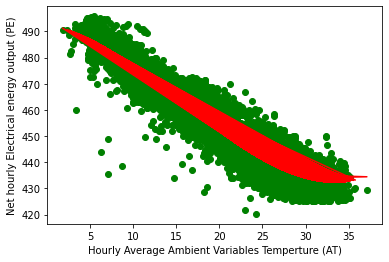

In [36]:
plt.scatter(df['AT'],df['PE'], color = 'green')
plt.plot(df['AT'], preds_polyLinearModel, color='red')
plt.xlabel('Hourly Average Ambient Variables Temperture (AT)')
plt.ylabel('Net hourly Electrical energy output (PE)')
plt.show()

In [37]:
df_V = df['V']
df_PE = df['PE']
polyModel = PolynomialFeatures(degree=3)
df_V = pd.DataFrame(df_V)
polyModel_V = polyModel.fit_transform(df_V)
polyLinearModel_V = smf.ols('PE~polyModel_V',df).fit()
preds_polyLinearModel = polyLinearModel_V.predict(df)
polyLinearModel_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:25   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        277.0734      4.575     60.557      0.000     268.105     286.042
polyModel_V[0]   277.0734      4.575     60.557      0.000     268.105     286.042
polyModel_V[1]    -2.1444      0.509     -4.214      0.000      -3.142      -1.147
polyModel_V[2]    -0.0027      0.009     -0.294      0.768      -0.021       0.015
polyModel_V[3]     0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.66e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.74e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

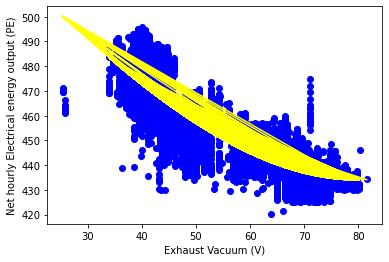

In [38]:
plt.scatter(df['V'],df['PE'], color = 'blue')
plt.plot(df['V'],preds_polyLinearModel , color='yellow')
plt.xlabel('Exhaust Vacuum (V)')
plt.ylabel('Net hourly Electrical energy output (PE)')
plt.show()

In [39]:
df_AP = df['AP']
df_PE = df['PE']
polyModel = PolynomialFeatures(degree=3)
df_AP = pd.DataFrame(df_AP)
polyModel_AP = polyModel.fit_transform(df_AP)
polyLinearModel_AP = smf.ols('PE~polyModel_AP',df).fit()
preds_polyLinearModel = polyLinearModel_AP.predict(df)
polyLinearModel_AP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:25   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0747      0.009      8.415      0.000       0.057       0.092
polyModel_AP[0]     0.0747      0.009      8.415      0.000       0.057       0.092
polyModel_AP[1]    25.2554      3.001      8.415      0.000      19.372      31.139
polyModel_AP[2]    -0.0500      0.006     -8.439      0.000      -0.062      -0.038
polyModel_AP[3]  2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     1.24e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

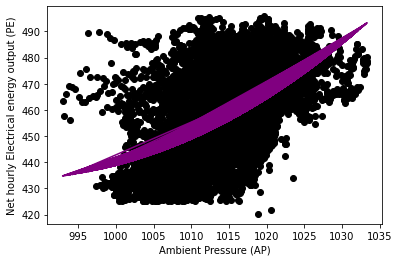

In [40]:
plt.scatter(df['AP'],df['PE'], color = 'black')
plt.plot(df['AP'], preds_polyLinearModel, color='purple')
plt.xlabel('Ambient Pressure (AP)')
plt.ylabel('Net hourly Electrical energy output (PE)')
plt.show()

In [41]:
df_RH = df['RH']
df_PE = df['PE']
polyModel = PolynomialFeatures(degree=3)
df_RH = pd.DataFrame(df_RH)
polyModel_RH = polyModel.fit_transform(df_RH)
polyLinearModel_RH = smf.ols('PE~polyModel_RH',df).fit()
preds_polyLinearModel = polyLinearModel_RH.predict(df)
polyLinearModel_RH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:26   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         234.2068      5.272     44.422      0.000     223.872     244.542
polyModel_RH[0]   234.2068      5.272     44.422      0.000     223.872     244.542
polyModel_RH[1]    -1.7292      0.486     -3.557      0.000      -2.682      -0.776
polyModel_RH[2]     0.0321      0.007      4.433      0.000       0.018       0.046
polyModel_RH[3]    -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     8.43e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.31e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

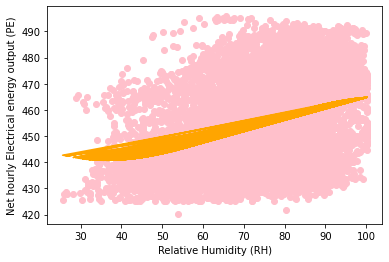

In [42]:
plt.scatter(df['RH'],df['PE'], color = 'pink')
plt.plot(df['RH'], preds_polyLinearModel, color='orange')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Net hourly Electrical energy output (PE)')
plt.show()

### (g) Interactions of Predictors

In [43]:
association = pd.DataFrame()
feature_list = ['AT', 'V', 'AP', 'RH']
for i in feature_list:
    association[i] = df[i]
    for j in feature_list:
        if i!=j:
            string = i + ':' + j
            association[string]=df[i]*df[j]

association = association.drop(columns=['V:AT', 'V:AP', 'V:RH', 'AP:AT', 'RH:AT', 'RH:AP'])
association['PE'] = df['PE']

association

,AT,AT:V,AT:AP,AT:RH,V,AP,AP:V,AP:RH,RH,RH:V,PE
0,14.96,624.7296,15320.0872,1094.6232,41.76,1024.07,42765.1632,74931.2019,73.17,3055.5792,463.26
1,25.18,1585.3328,25684.6072,1487.6344,62.96,1020.04,64221.7184,60263.9632,59.08,3719.6768,444.37
2,5.11,201.3340,5172.1376,470.8354,39.40,1012.16,39879.1040,93260.4224,92.14,3630.3160,488.56
3,20.86,1195.6952,21073.6064,1598.7104,57.32,1010.24,57906.9568,77424.7936,76.64,4393.0048,446.48
4,10.82,405.7500,10919.8686,1045.4284,37.50,1009.23,37846.1250,97511.8026,96.62,3623.2500,473.90
...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,827.3385,16883.2665,1515.1500,49.69,1014.01,50386.1569,92274.9100,91.00,4521.7900,460.03
9564,13.19,516.7842,13502.2073,880.8282,39.18,1023.67,40107.3906,68360.6826,66.78,2616.4404,469.62
9565,31.32,2328.0156,31724.6544,1142.5536,74.33,1012.92,75290.3436,36951.3216,36.48,2711.5584,429.57
9566,24.48,1700.1360,24819.2928,1527.3072,69.45,1013.86,70412.5770,63254.7254,62.39,4332.9855,435.74


In [44]:
association_model = smf.ols(formula='PE ~ AT + V + AP + RH + AT:V  +   AT:AP  +  AT:RH    +  AP:V   +  AP:RH   +  RH:V', 
                            data=association).fit()
association_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:27   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
AP:V           0.0068      0.001      5.135      0.000       0.004       0.009
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
RH:V           0.0008      0.000      1.716      0.086      -0.000       0.002
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above values show that the p-value for AT feature is above 0.05, hence making it statistically insignificant, however AT&V together have a low p-value, because of which we will not remove the feature 'AT' from the dataset.

Secondly, 'AT&AP' and 'RH&V' have a p-value greater than 0.05, which makes them statistically insignificant hence we can chuck these feature pairings from the data.

### (h) Improvement

In [45]:
train,test = train_test_split(df,test_size=.3,random_state=0)

In [46]:
x=df.iloc[:,:4]
y=df.iloc[:,4]

In [47]:
x,y

(         AT      V       AP     RH
 0     14.96  41.76  1024.07  73.17
 1     25.18  62.96  1020.04  59.08
 2      5.11  39.40  1012.16  92.14
 3     20.86  57.32  1010.24  76.64
 4     10.82  37.50  1009.23  96.62
 ...     ...    ...      ...    ...
 9563  16.65  49.69  1014.01  91.00
 9564  13.19  39.18  1023.67  66.78
 9565  31.32  74.33  1012.92  36.48
 9566  24.48  69.45  1013.86  62.39
 9567  21.60  62.52  1017.23  67.87
 
 [9568 rows x 4 columns],
 0       463.26
 1       444.37
 2       488.56
 3       446.48
 4       473.90
          ...  
 9563    460.03
 9564    469.62
 9565    429.57
 9566    435.74
 9567    453.28
 Name: PE, Length: 9568, dtype: float64)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=0)

Using all the variables for a simple linear regression model, to check MSE

In [49]:
normal_slm  = smf.ols("PE ~ AT + V + AP + RH", train).fit()
#fitting training data to model
preds_normal_slm_train = normal_slm.predict(train)


In [50]:
#fitting testing data to model
preds_normal_slm_test = normal_slm.predict(test)

Finding MSE for testing and training

In [51]:
# rms_error = rmse(y_test, prediction_linear_test)
test_error_slm = mean_squared_error(y_test, preds_normal_slm_test)
print('MSE for training: ',mean_squared_error(y_train,preds_normal_slm_train),
      'and MSE for testing: ',test_error_slm)

MSE for training:  20.941563616739572 and MSE for testing:  20.368383002885892


Creating a Regression Model with all pairwise interactions and quadratic terms

In [52]:
all_terms_slm = smf.ols('PE ~ AT + V + AP + RH + I(AT**2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH  + I(V**2) + I(AP**2) + I(RH**2)',
                        train).fit()
preds_allTermSLM = all_terms_slm.predict(test)

In [53]:
all_term_model_MSE_testError = mean_squared_error(y_test,preds_allTermSLM)
all_term_model_MSE_testError

17.520160997512757

TEST ERROR WHEN INCLUDING ALL FEATURES WHILE PREDICTING RESPONSE IS: 17.520160997673518

In [54]:
all_terms_slm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:28   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7073.1567   1505.522     -4.698      0.000      -1e+04   -4121.854
AT            -6.3067      3.826     -1.648      0.099     -13.807       1.194
V             -2.7832      1.818     -1.531      0.126      -6.347       0.780
AP            14.8033      2.916      5.076      0.000       9.086      20.521
RH             3.3825      1.086      3.114      0.002       1.253       5.512
I(AT ** 2)     0.0168      0.004      4.482      0.000       0.009       0.024
AT:V           0.0103      0.003      3.174      0.002       0.004       0.017
AT:AP          0.0037      0.004      0.997      0.319      -0.004       0.011
AT:RH         -0.0061      0.002     -3.305      0.001      -0.010      -0.002
V:AP           0.0023      0.002      1.290      0.197      -0.001       0.006
V:RH           0.0003      0.001      0.340      0.734      -0.001       0.002
AP:RH         -0.0031      0.001     -2.934      0.003      -0.005      -0.001
I(V ** 2)     -0.0005      0.001     -0.551      0.581      -0.002       0.001
I(AP ** 2)    -0.0072      0.001     -5.108      0.000      -0.010      -0.004
I(RH ** 2)    -0.0019      0.000     -5.901      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1415.014   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12113.210
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.96e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__As mentioned in the Question we have to remove all the terms which are not statistically significant and keep the ones which are.
Hence We are removing V**2,AT:AP, V:AP and V:RH
And Retaining the others and againing computing MSEs for both Train and Test__

In [55]:
final_model = smf.ols('PE ~ V+ AT + AP + RH + I(AT**2) + AT*V  + AT*RH + AP*RH  + I(AP**2) + I(RH**2) ', 
                      train).fit()
preds_final_model_train = final_model.predict(train)
mse_final_train = mean_squared_error(y_train, preds_final_model_train)
preds_final_model_test = final_model.predict(test)
mse_final_test = mean_squared_error(y_test, preds_final_model_test)
print('MSE Training: ',mse_final_train,' and MSE Testing: ',mse_final_test)


MSE Training:  18.399355799042546  and MSE Testing:  17.565669596587995


MSE TRAINING IS 18.39935579904325 AND MSE TESTING IS 17.56566959660093

In [56]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:28   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.001e+04   1121.577     -8.921      0.000   -1.22e+04   -7807.468
V             -0.4573      0.032    -14.354      0.000      -0.520      -0.395
AT            -2.3374      0.102    -23.013      0.000      -2.537      -2.138
AP            20.2770      2.216      9.150      0.000      15.933      24.621
RH             5.1379      0.784      6.552      0.000       3.601       6.675
I(AT ** 2)     0.0164      0.002      7.184      0.000       0.012       0.021
AT:V           0.0077      0.001      5.283      0.000       0.005       0.011
AT:RH         -0.0071      0.001     -8.010      0.000      -0.009      -0.005
AP:RH         -0.0048      0.001     -6.281      0.000      -0.006      -0.003
I(AP ** 2)    -0.0098      0.001     -8.922      0.000      -0.012      -0.008
I(RH ** 2)    -0.0020      0.000     -7.271      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1410.695   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11779.233
Skew:                          -0.774   Prob(JB):                         0.00
Kurtosis:                       9.310   Cond. No.                     2.20e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Above summary shows that all the features and interaction features used have extremely low p-values i.e. below 0.05 hence all are statistically significant and are the most efficient final form of model

### (i) KNN

In [57]:
final_list_test= []
final_list_train= [] 
for k in range(1,101,1):
    temp1,temp2=[],[]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train) 
    preds_KNNTest = knn.predict(x_test)
    mse_test = (mean_squared_error(y_test,preds_KNNTest)) 
    temp1.append(k)
    temp1.append(mse_test)
    preds_KNNTrain = knn.predict(x_train)
    mse_train=(mean_squared_error(y_train,preds_KNNTrain)) 
    temp2.append(k)
    temp2.append(mse_train)
    final_list_test.append(temp1)
    final_list_train.append(temp2)

In [58]:
final_list_test

[[1, 22.578229536746782],
 [2, 17.93334182340648],
 [3, 16.466587530477184],
 [4, 15.88698026384535],
 [5, 15.6635051689307],
 [6, 15.732130433646825],
 [7, 15.910543952544455],
 [8, 16.042966018482232],
 [9, 16.222580479550718],
 [10, 16.30541188610239],
 [11, 16.466153067580898],
 [12, 16.556084550727572],
 [13, 16.581670698208345],
 [14, 16.635026905401645],
 [15, 16.829076117341987],
 [16, 16.944992292809566],
 [17, 17.079978323625234],
 [18, 17.273048839286872],
 [19, 17.341845642884095],
 [20, 17.481055471351453],
 [21, 17.567856484226112],
 [22, 17.675995318027812],
 [23, 17.744279016157275],
 [24, 17.830858541170805],
 [25, 17.963574115444093],
 [26, 18.0619782612392],
 [27, 18.14475990757583],
 [28, 18.23615056391678],
 [29, 18.337306086325544],
 [30, 18.45049272425403],
 [31, 18.54627996118926],
 [32, 18.671152108266114],
 [33, 18.763344617960097],
 [34, 18.821524183699545],
 [35, 18.920268853290118],
 [36, 18.989821928442584],
 [37, 19.06085924675841],
 [38, 19.1221052134440

In [59]:
#making an array with values of 1/i all the way from 1 to 100
fractional_k_arr=[1/i for i in range(1,101)]

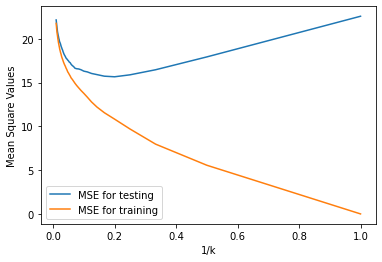

In [60]:
test_plot=[]
train_plot=[]
for i,j in zip(final_list_test,final_list_train):
    test_plot.append(i[1])
    train_plot.append(j[1])
plt.plot(fractional_k_arr,test_plot,label='MSE for testing')
plt.plot(fractional_k_arr,train_plot,label='MSE for training')
plt.ylabel('Mean Square Values')
plt.xlabel('1/k')
plt.legend()
plt.show()

__The Best K and corresponding MSE values while considering Raw Features____The Best K and corresponding MSE values while considering Raw Features__

In [61]:
sorted_test_list = sorted(final_list_test,key=lambda x: (x[1],-x[0]))
best_k,best_MSE = sorted_test_list[0]
print('Best K for normal KNN model:',best_k,'and its MSE:',best_MSE)

Best K for normal KNN model: 5 and its MSE: 15.6635051689307


__considering Normalizing the Data__

In [62]:
scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [63]:
X_train=pd.DataFrame(x_train_scale)
X_test=pd.DataFrame(x_test_scale)

In [ ]:
final_list_test_normalized= []
final_list_train_normalized= [] 
for q in range(1,101,1):
    temp3,temp4 = [],[]
    knn2 = KNeighborsRegressor(n_neighbors = q)
    knn2.fit(X_train, y_train) 
    preds_normalized_test = knn2.predict(X_test)
    mse_test_n = (mean_squared_error(y_test,preds_normalized_test)) 
    temp3.append(q)
    temp3.append(mse_test_n)
    preds_normalized_train = knn2.predict(X_train)
    mse_train_n = (mean_squared_error(y_train,preds_normalized_train)) 
    temp4.append(q)
    temp4.append(mse_train_n)
    final_list_test_normalized.append(temp3)
    final_list_train_normalized.append(temp4)

In [ ]:
#making an array for values of 1/k from 1 to 100
fractional_k_arr2=[1/g for g in range(1,101,1)]

In [ ]:
test_plot2=[]
train_plot2=[]

for h,m in zip(final_list_test_normalized,final_list_train_normalized):
    test_plot2.append(h[1])
    train_plot2.append(m[1])

In [ ]:
plt.plot(fractional_k_arr2,test_plot2,label='Test MSEs')
plt.plot(fractional_k_arr2,train_plot2,label='Train MSEs')
plt.ylabel('Mean Square Values')
plt.xlabel('1/k')
plt.legend()
plt.show()

__The Best K and corresponding MSE with Normalizing the data__

In [ ]:
sorted_test_normalized = sorted(final_list_test_normalized,key=lambda x: (x[1],-x[0]))
bestk_normalized,mse_normalized = sorted_test_normalized[0]

In [ ]:
print('Best K for KNN normalized model:',bestk_normalized,'and its MSE:',mse_normalized)

### (j ) Compare KNN and Linear

In [ ]:
metricTable={'Regression Model Type':['Linear regression model with all 4 features', 
                            'Regression model with some removed features', 
                            'KNN regression without normalization',
                                 'KNN regression with normalization'], 
             'MSE based on regression model types':[test_error_slm,mse_final_test,best_MSE,mse_normalized]}
df2 = pd.DataFrame(data=metricTable)
df2

In [ ]:
pip freeze >  requirements.txt

__We find out that the most optimal model is KNN regression after normalization with MSE of 14.65__


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

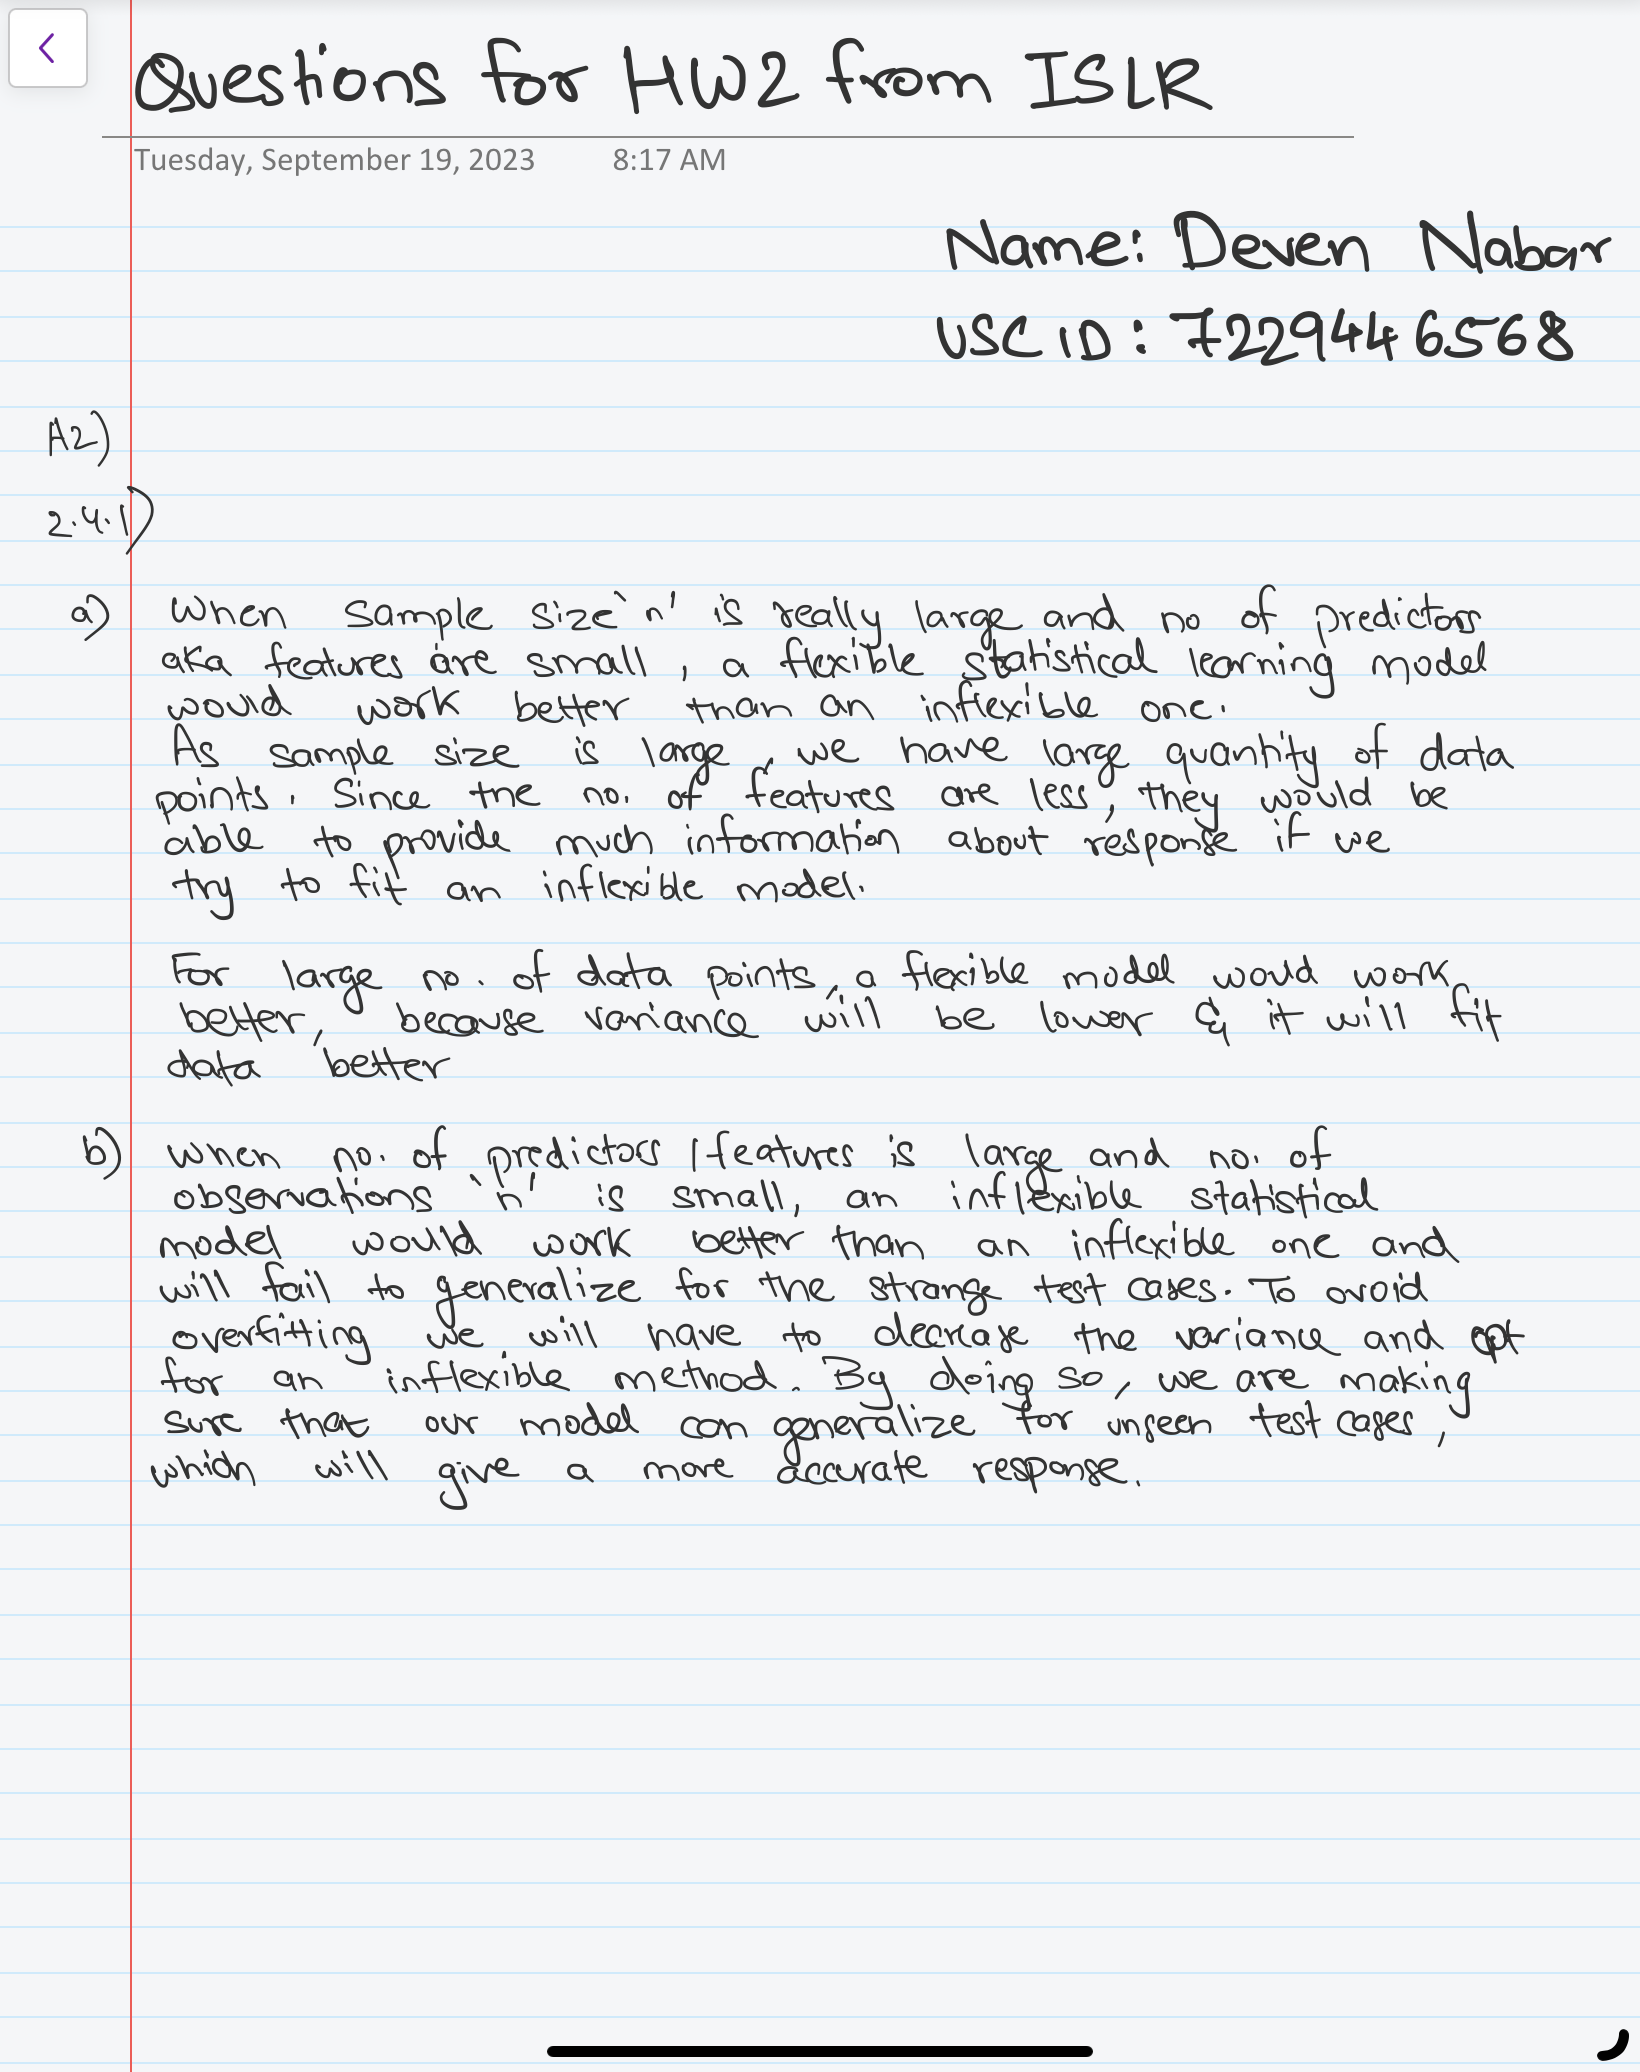

### (c) The relationship between the predictors and response is highly non-linear.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

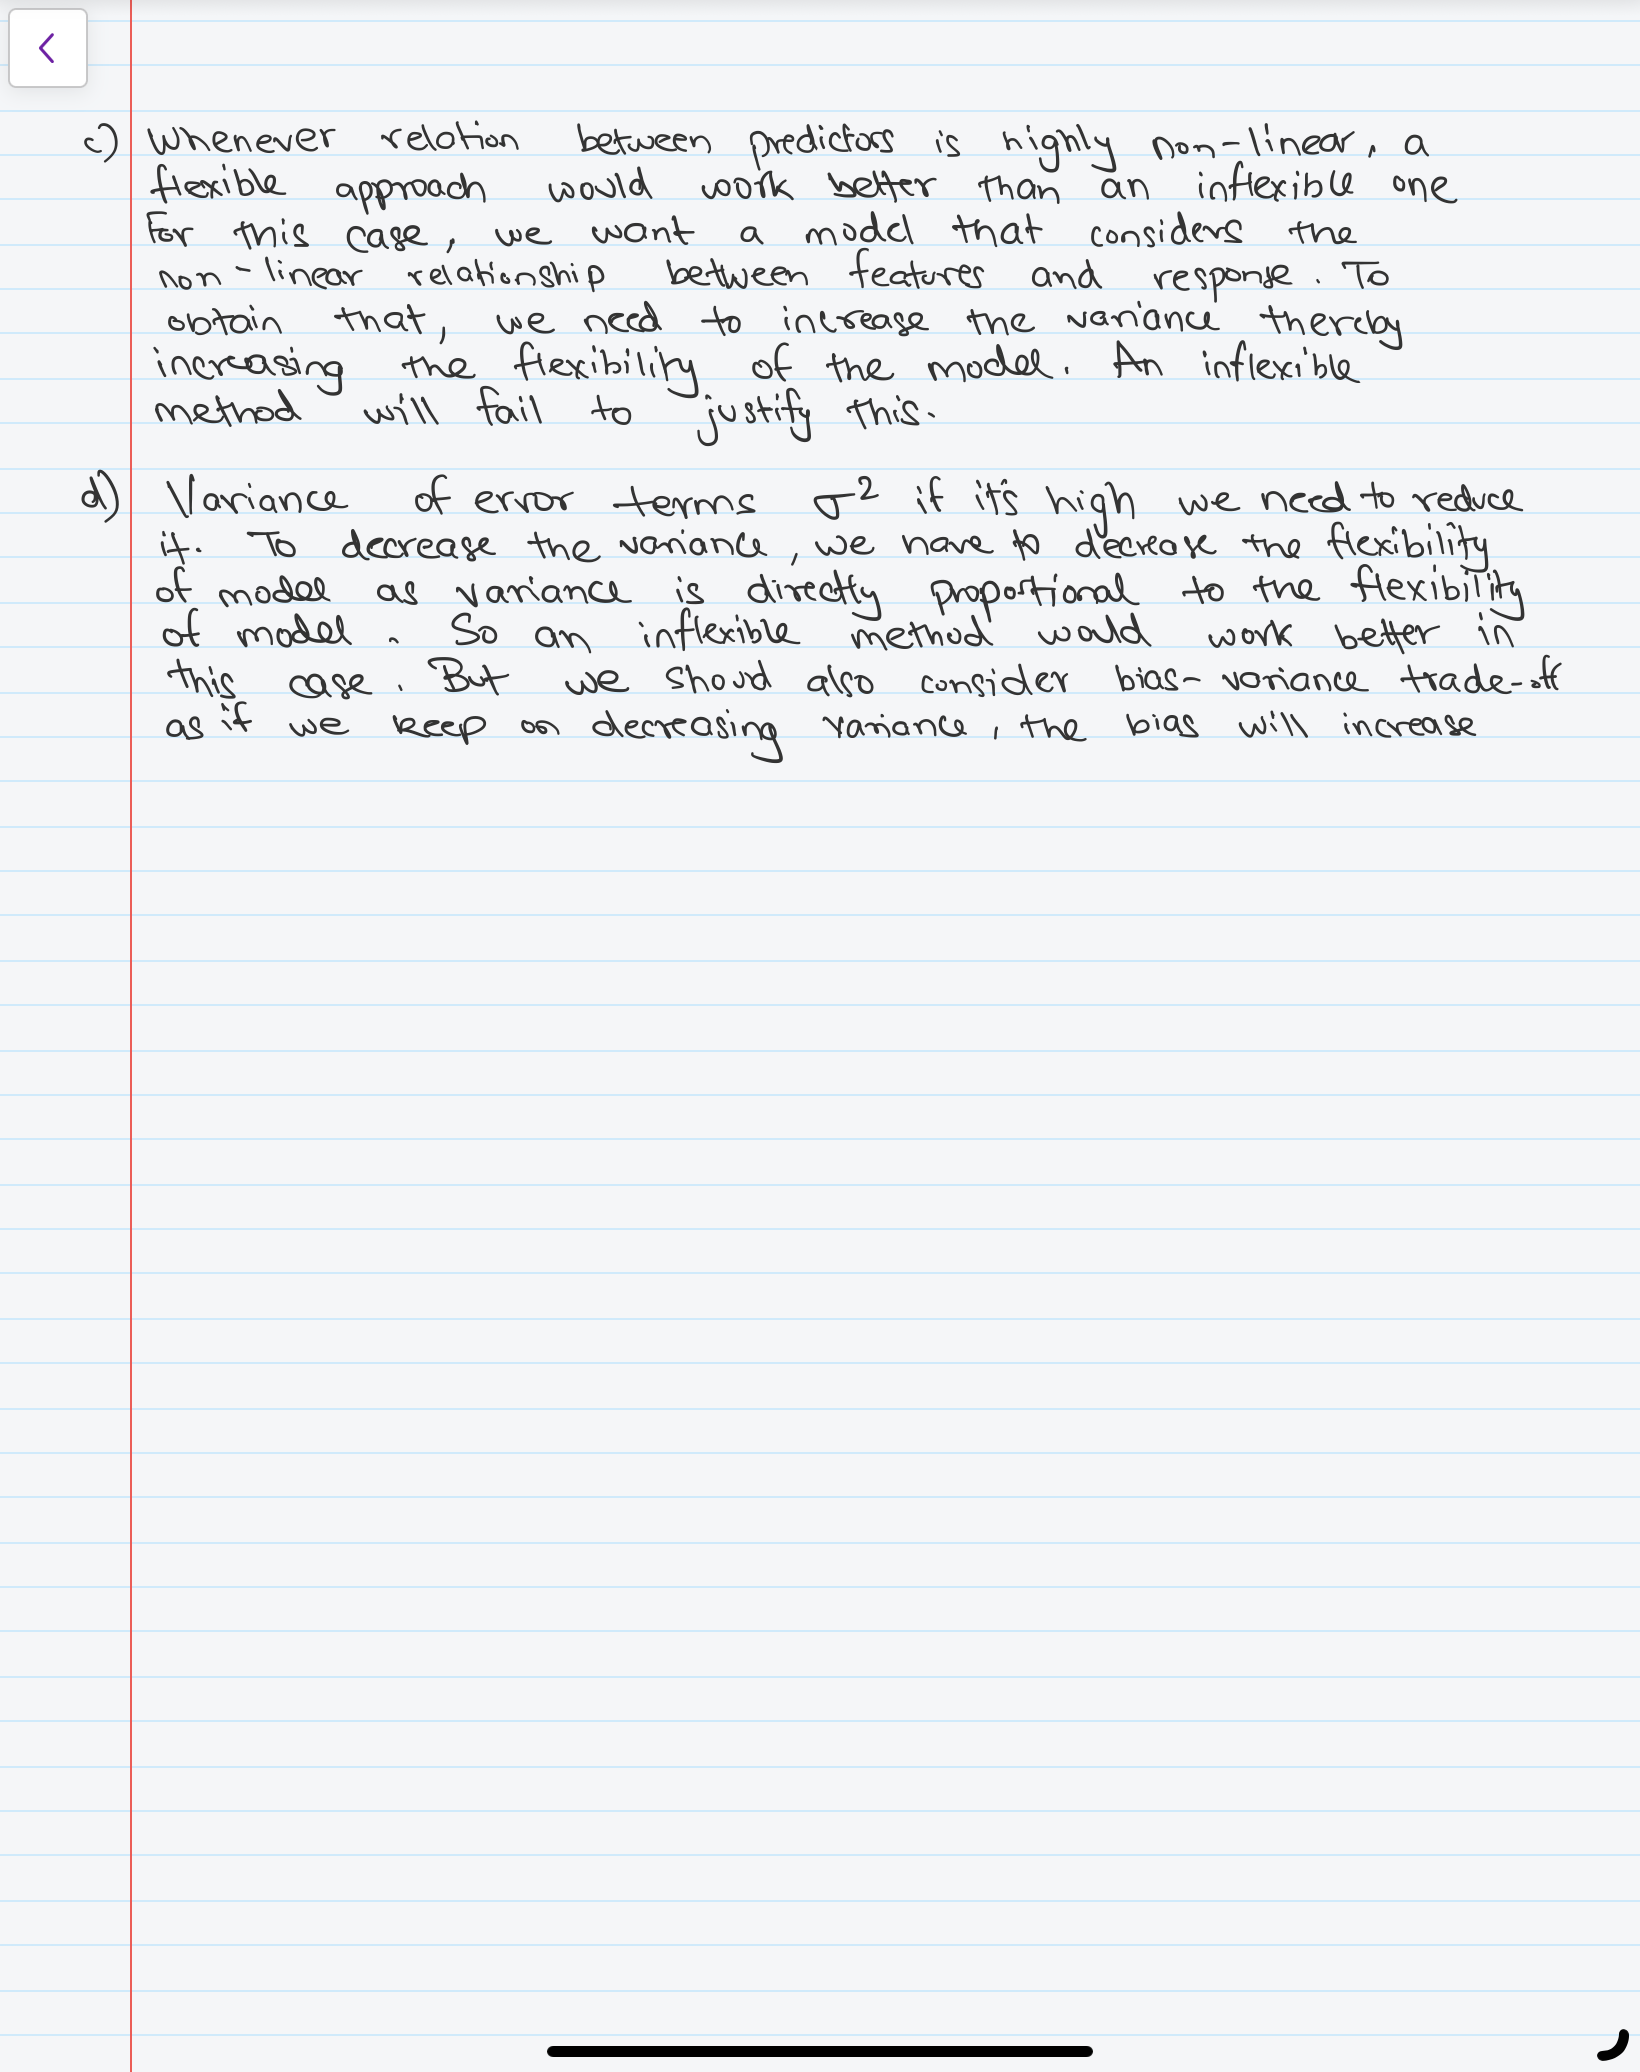

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

### (b) What is our prediction with K = 1? Why?

### (c) What is our prediction with K = 3? Why?

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

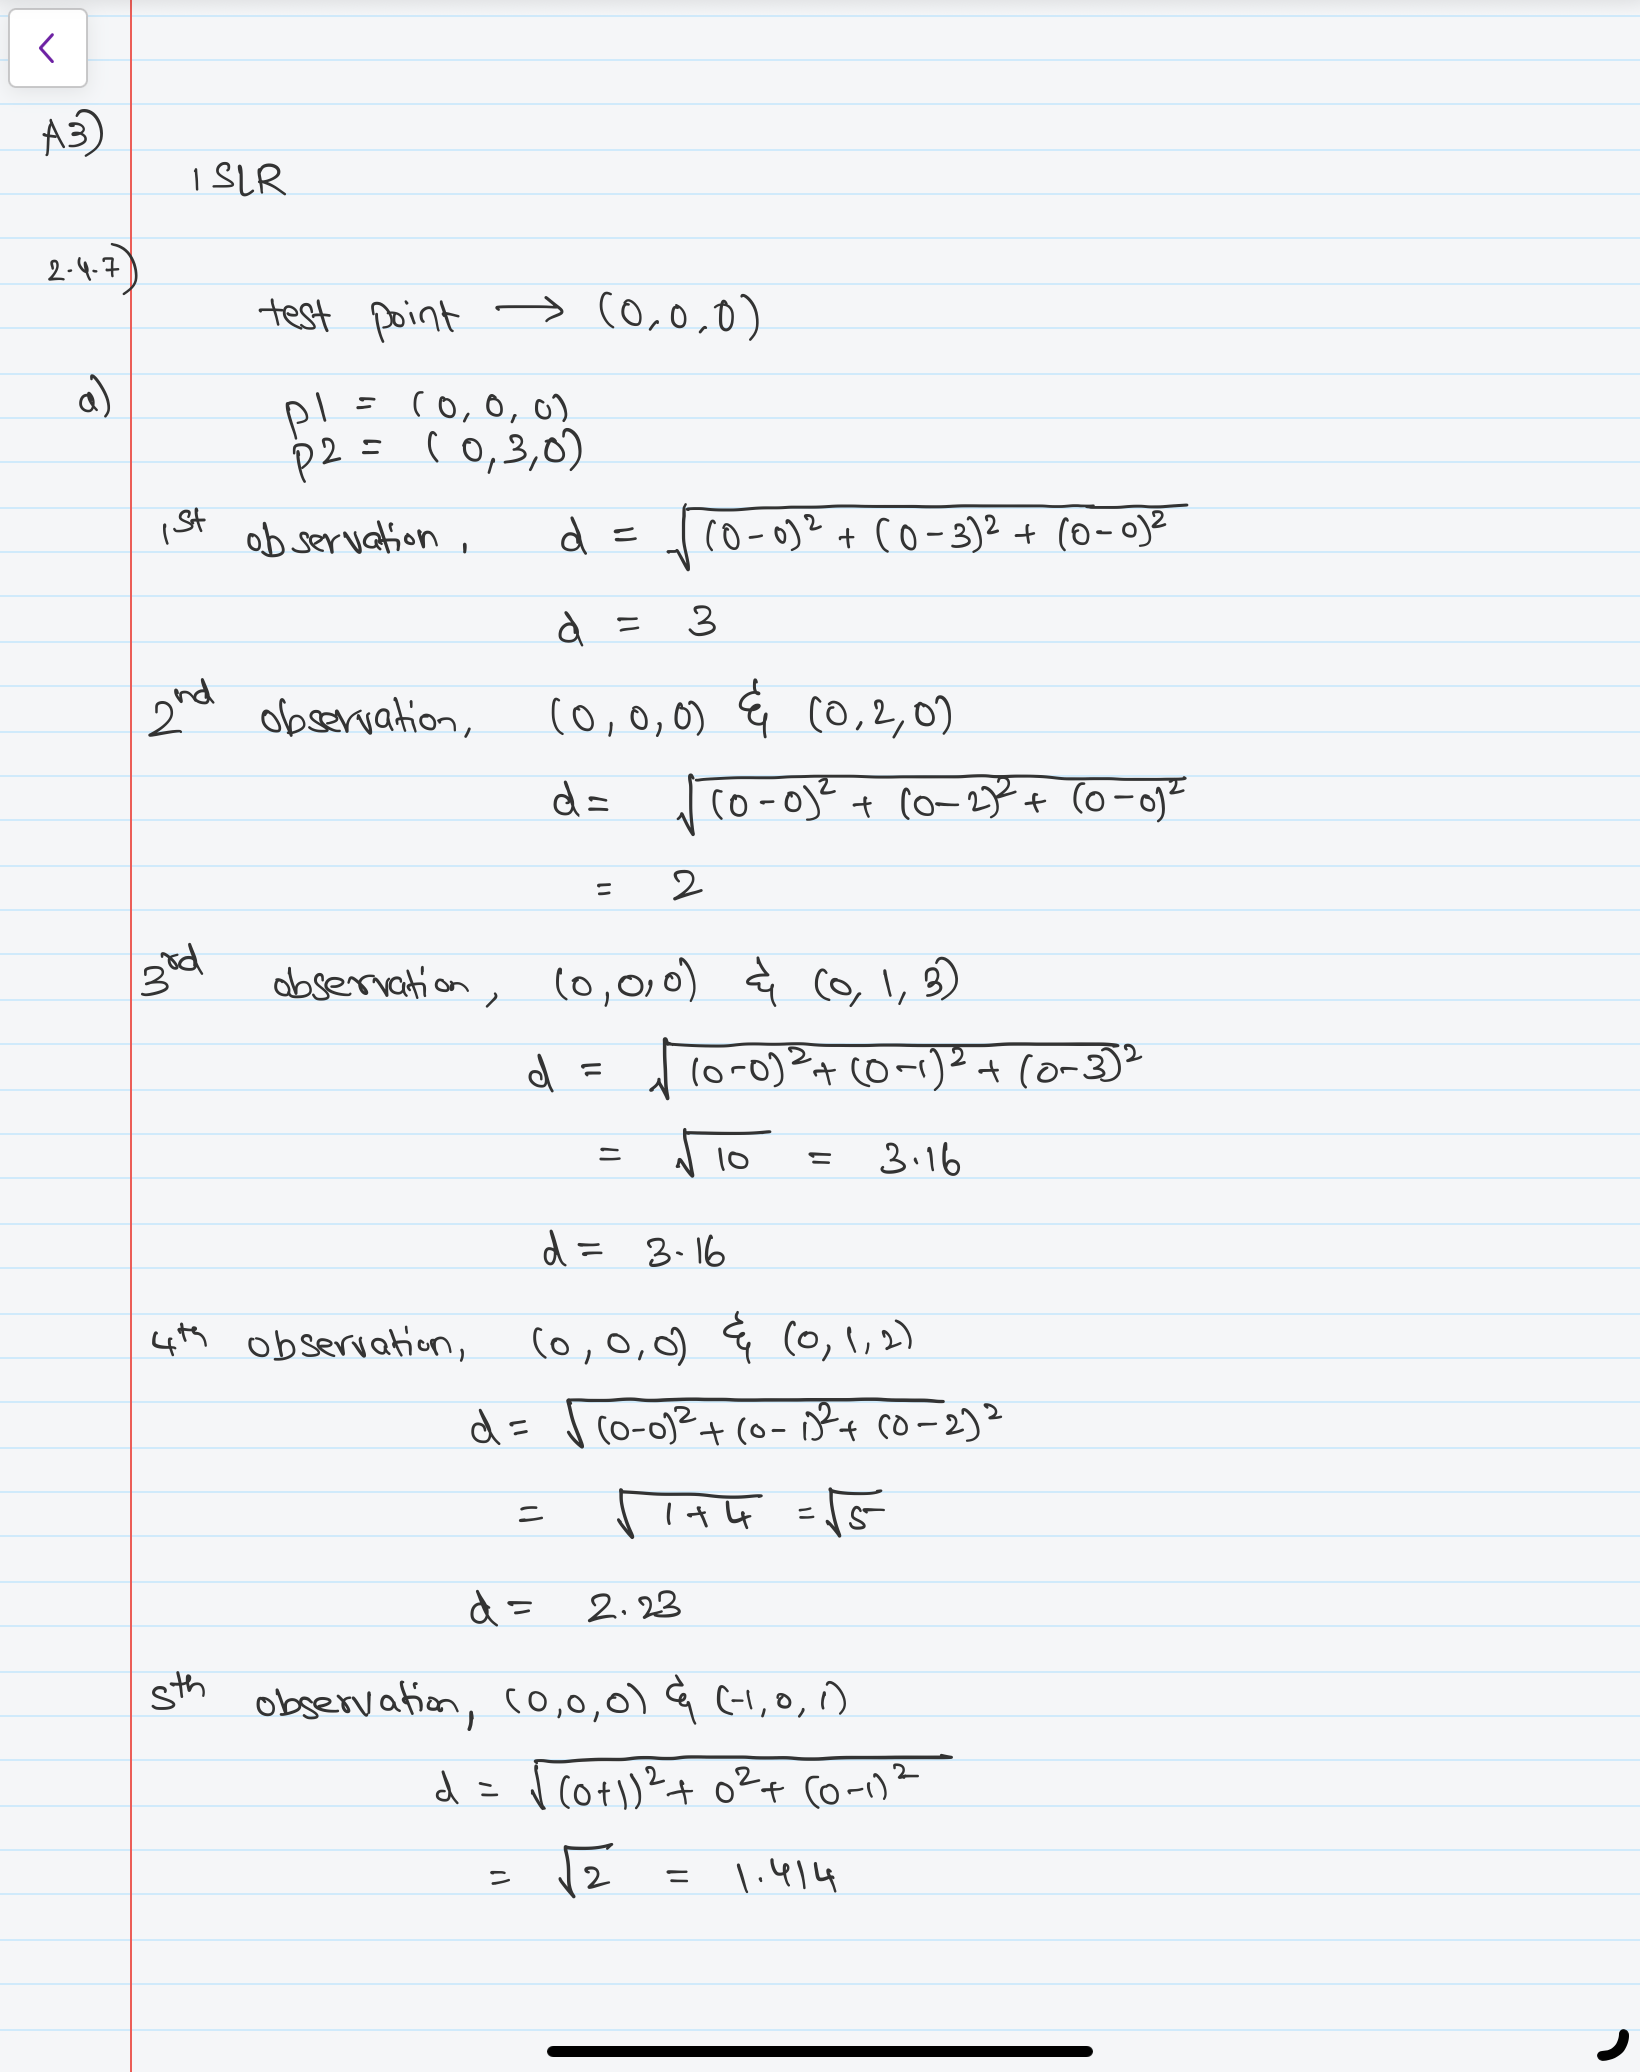

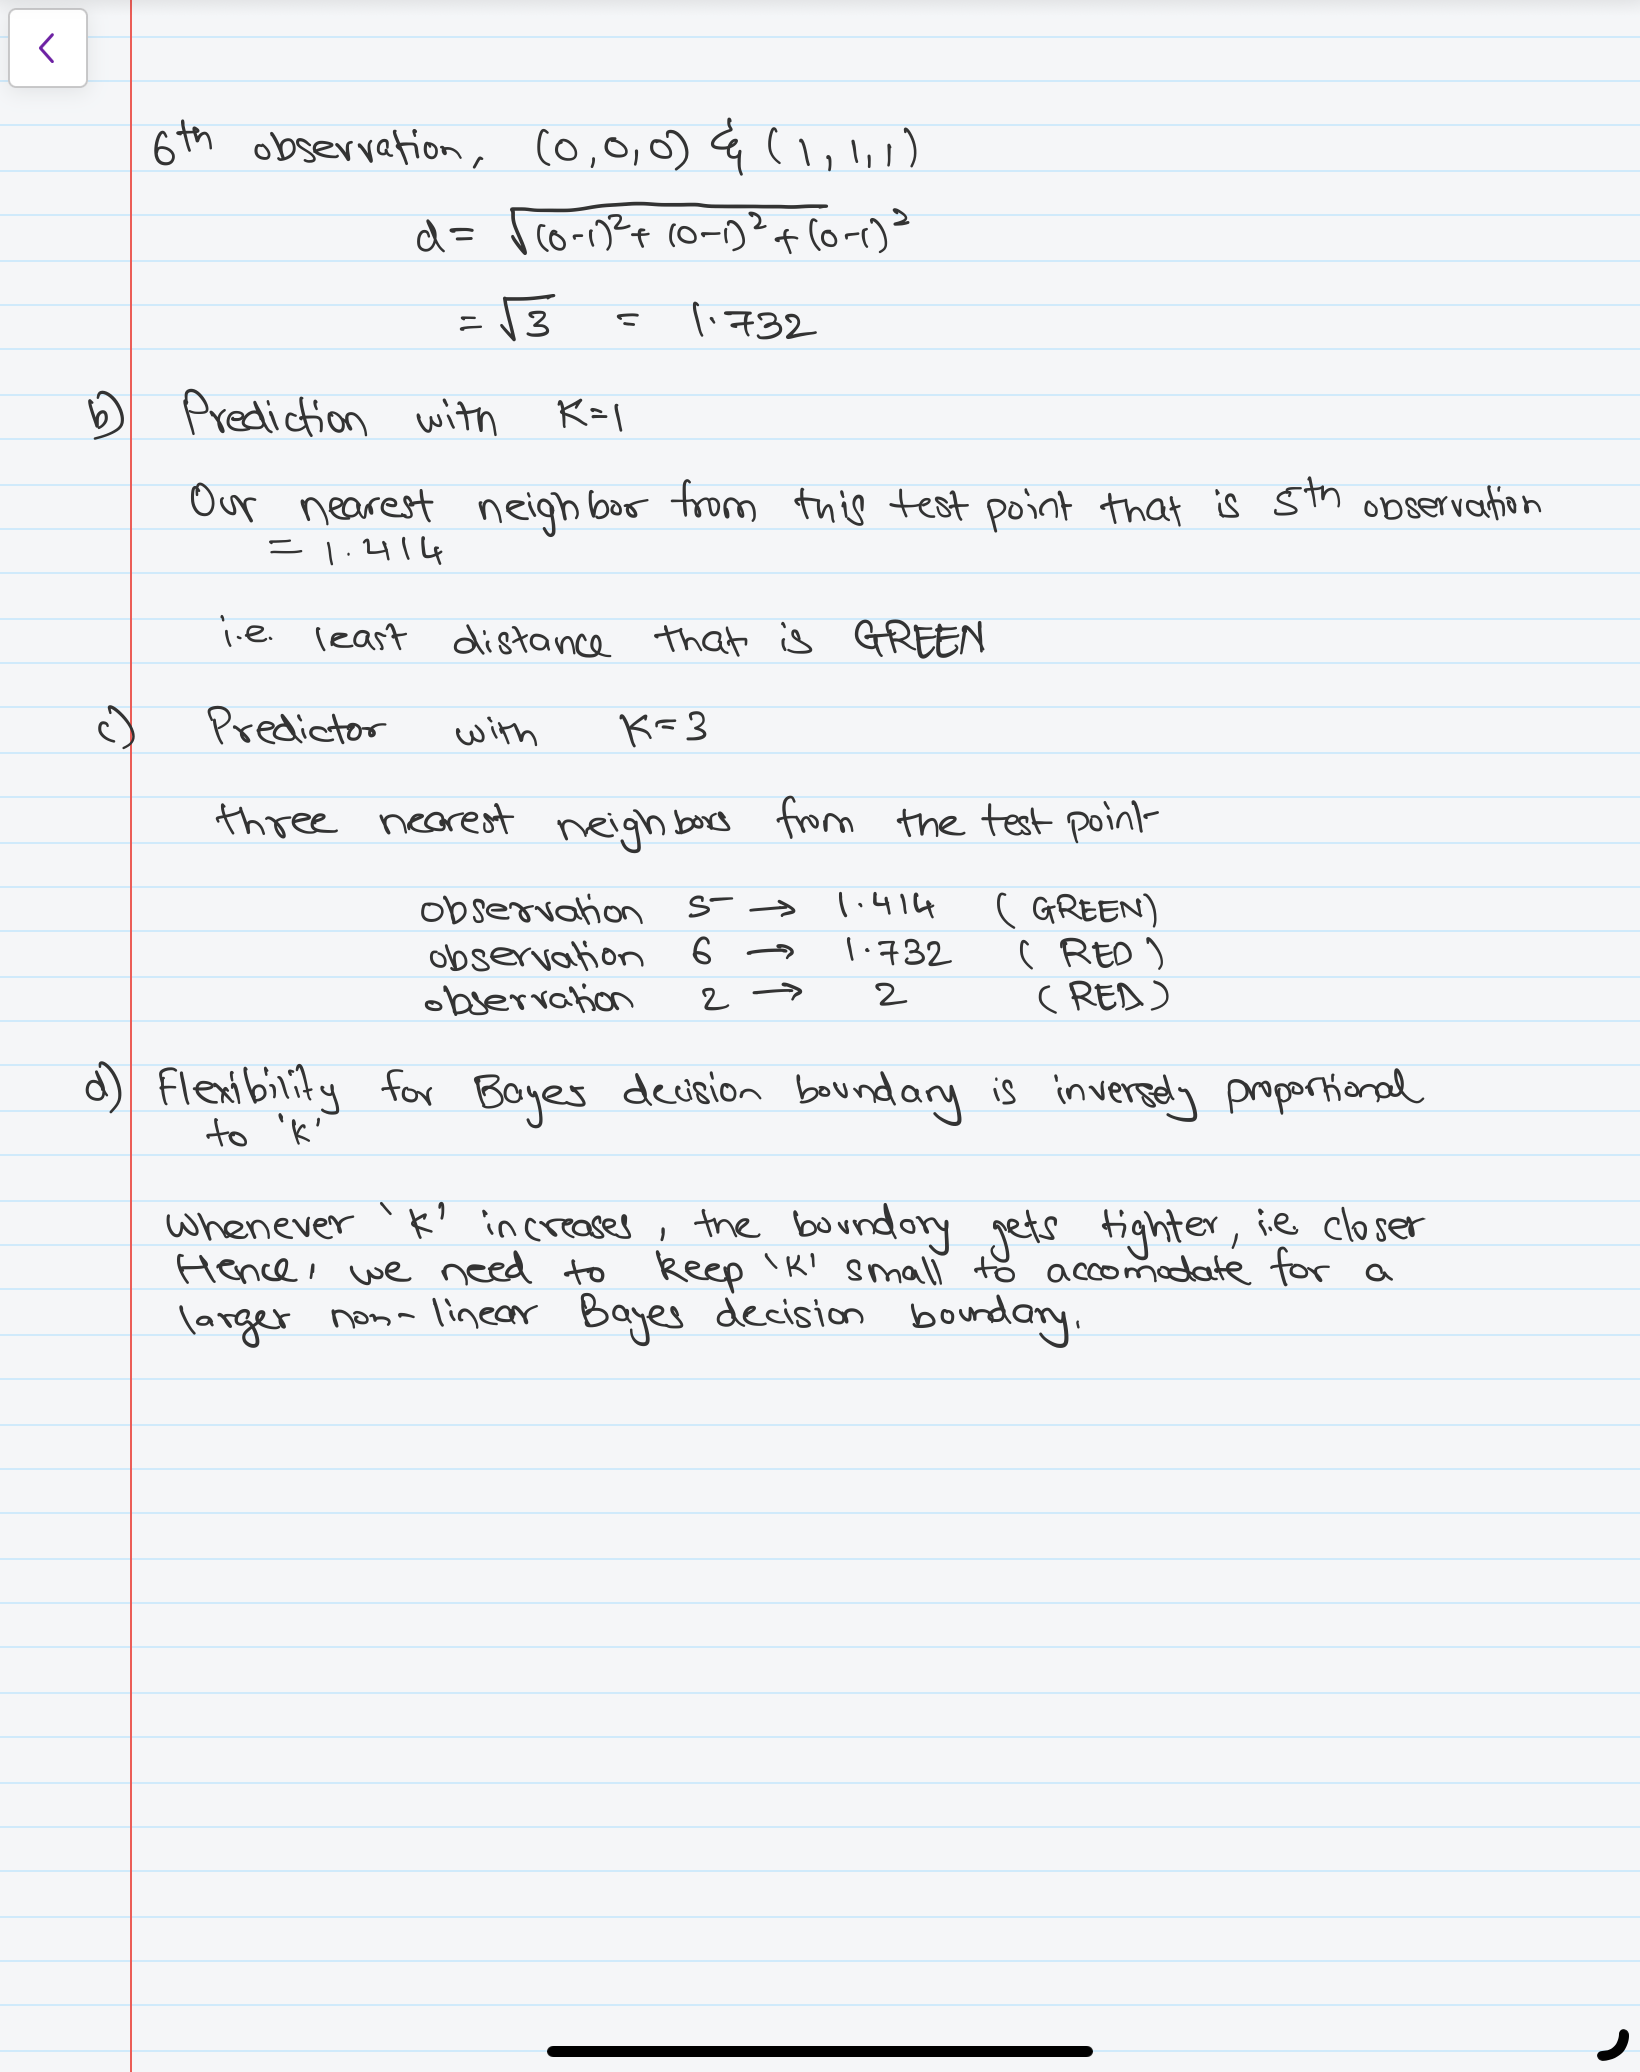